<a href="https://colab.research.google.com/github/rsaeed15/rsaeed15/blob/main/fsi_nn_feature_importance_permuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Rifat Saeed
# Feature Importance of State Fragility Index's Variables

In [2]:
#load libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# This sets a common size for all the figures we will draw.
plt.rcParams['figure.figsize'] = [10, 7]

In [4]:
# Uploading spam csv file
from google.colab import files
uploaded = files.upload()

Saving cds_file_updated.csv to cds_file_updated.csv


In [5]:
# Building a spam mail classifier in Python
import pandas as pd
import io
df = pd.read_csv(r'cds_file_updated.csv',encoding='ISO-8859-1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dp      660 non-null    int64  
 1   ref     660 non-null    int64  
 2   gg      660 non-null    int64  
 3   hf      660 non-null    int64  
 4   ud      660 non-null    int64  
 5   ped     660 non-null    int64  
 6   ls      660 non-null    int64  
 7   ps      660 non-null    int64  
 8   hr      660 non-null    int64  
 9   sa      660 non-null    int64  
 10  fe      660 non-null    int64  
 11  ei      660 non-null    int64  
 12  lfsi    660 non-null    float64
dtypes: float64(1), int64(12)
memory usage: 67.2 KB


In [7]:
features=['dp','ref','gg','hf','ud','ped','ls','ps','hr','sa','fe','ei']

In [8]:
X=df[['dp','ref','gg','hf','ud','ped','ls','ps','hr','sa','fe','ei']].values
y = df['lfsi'].values

In [9]:
#split the data 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) 

In [10]:
from keras import regularizers
model = Sequential()
model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(6, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history=model.fit(X_train, y_train, epochs=500, batch_size=10, verbose=1, validation_split=0.1)

Epoch 1/500
54/54 [==============================] - 1s 6ms/step - loss: 8.4717 - mse: 8.4710 - val_loss: 1.8451 - val_mse: 1.8444
Epoch 2/500
54/54 [==============================] - 0s 3ms/step - loss: 1.0863 - mse: 1.0855 - val_loss: 0.7227 - val_mse: 0.7220
Epoch 3/500
54/54 [==============================] - 0s 2ms/step - loss: 0.7808 - mse: 0.7802 - val_loss: 0.5716 - val_mse: 0.5710
Epoch 4/500
54/54 [==============================] - 0s 2ms/step - loss: 0.6464 - mse: 0.6457 - val_loss: 0.4745 - val_mse: 0.4739
Epoch 5/500
54/54 [==============================] - 0s 3ms/step - loss: 0.5230 - mse: 0.5224 - val_loss: 0.3965 - val_mse: 0.3958
Epoch 6/500
54/54 [==============================] - 0s 3ms/step - loss: 0.4159 - mse: 0.4153 - val_loss: 0.3166 - val_mse: 0.3160
Epoch 7/500
54/54 [==============================] - 0s 2ms/step - loss: 0.3174 - mse: 0.3167 - val_loss: 0.2361 - val_mse: 0.2355
Epoch 8/500
54/54 [==============================] - 0s 2ms/step - loss: 0.2450 - m

In [15]:
y_pred=model.predict(X_train[[2,]])
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 9ms/step - loss: 0.0014 - mse: 0.0011


[0.0013760284055024385, 0.0010585624258965254]

In [16]:
y_pred

array([[3.3138633]], dtype=float32)

In [18]:
y_train[[2,]]

array([3.29583687])

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


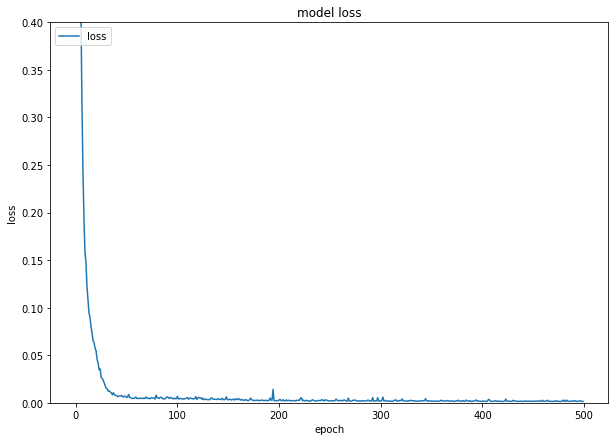

In [19]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.ylim(0,0.4)
plt.show()

In [20]:
# perform permutation importance
from sklearn.inspection import permutation_importance
results = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error') 

3/3 [==============================] - 0s 3ms/step


Feature: 0, Score: 0.00250
Feature: 1, Score: 0.00433
Feature: 2, Score: 0.00462
Feature: 3, Score: 0.00440
Feature: 4, Score: 0.00778
Feature: 5, Score: 0.00290
Feature: 6, Score: 0.00497
Feature: 7, Score: 0.00461
Feature: 8, Score: 0.00449
Feature: 9, Score: 0.00473
Feature: 10, Score: 0.01016
Feature: 11, Score: 0.00524


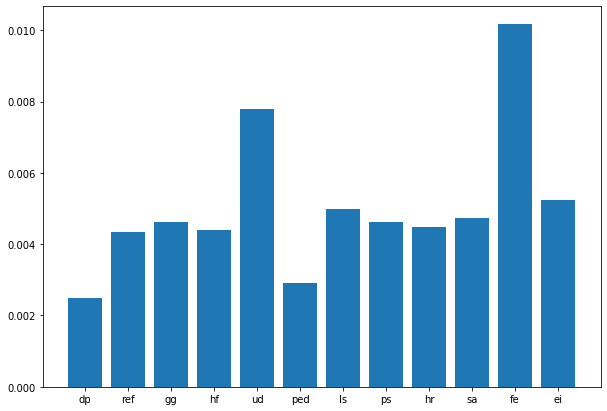

In [27]:
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in features], importance)
# plt.bar([x for x in range(len(importance))], importance)
plt.show()